In [7]:
#Importing Basic Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
#Percentage of missing values in the dataset
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [12]:
#Because our dataset contains some missing values will fill in them


# Creating the KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# Extracting the 'bmi' column
bmi_column = df['bmi']

# Filling missing values in the 'bmi' column
bmi_filled = imputer.fit_transform(bmi_column.values.reshape(-1, 1))

# Assigning the filled 'bmi' column back to df
df['bmi'] = bmi_filled

# Displaying the updated DataFrame
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

In [15]:
df_home = df['smoking_status'].value_counts().reset_index()

print(df_home)


    smoking_status  count
0     never smoked   1892
1          Unknown   1544
2  formerly smoked    885
3           smokes    789


ValueError: could not convert string to float: 'never smoked'

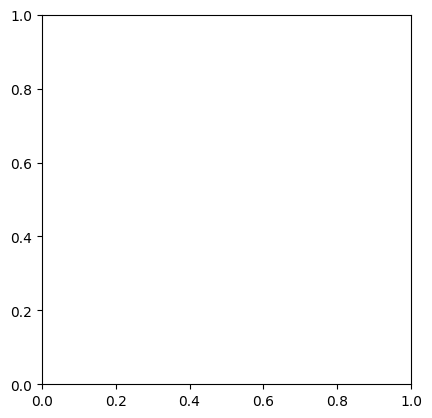

In [27]:
# visualizing the data using matplotlib pie chart
%matplotlib inline

df_home.columns = df_home.columns.str.strip()  # Remove trailing spaces
plt.pie(df_home['smoking_status'])  # Replace 'Your_Column_Name' with the actual column name

plt.figure(figsize=(10, 6))
plt.pie(df_home['smoking_status'], labels=df_home['count'], autopct='%1.1f%%')
plt.title('Smoking Status')
plt.show()


#key error, index is not a column name


In [ ]:



# plt.figure(figsize=(10, 6))
# plt.bar(df_home['count'], df_home['smoking_status'])
# plt.title('Smoking Status')
# plt.xlabel('Smoking Status')
# plt.ylabel('Count')
# plt.show()




# plt.pie(df_home['smoking_status'], labels=df_home['smoking_status'], autopct='%1.1f%%')
# plt.title('Smoking Status')
# 

# plt.show()